In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.model_selection import train_test_split
from scipy.stats import variation, normaltest

In [2]:
# PANDAS OPTIONS
pd.set_option('display.max_columns', None)

In [3]:
# IMPORTA DATASET
df = pd.read_csv('datasets/custom/dataset_2.csv')

In [4]:
df

,ID da música,Duração (em minutos),Estimativa de popularidade nos EUA,Dançabilidade,Energia,Instrumentalidade,Ano de Lançamento,Escala musical,Música foi pulada no início,Música não foi pulada,Escutada em qual hora do dia
0,t_feb4ef97-cd30-4c33-9032-ef1f1a58d655,3.366444,99.835139,0.765982,0.761067,2.401338e-12,2017,Menor,Falso,Falso,9
1,t_7a7e4a76-7914-4d21-8773-6a54a0812de5,3.844000,99.982884,0.628740,0.736263,4.961319e-08,2016,Maior,Verdadeiro,Verdadeiro,14
2,t_f0db29da-fe13-472b-bfdf-d5a0bd783502,4.127111,99.973848,0.630953,0.749407,5.208510e-06,1971,Maior,Falso,Verdadeiro,22
3,t_c823babf-7191-49b0-ba86-48439914cc62,4.175238,99.447559,0.713650,0.619660,6.433872e-01,2015,Menor,Falso,Verdadeiro,16
4,t_93f9d8eb-6110-47d6-a1e4-6b6b9819f1d1,4.569333,99.791719,0.656329,0.654815,2.488995e-08,2016,Menor,Verdadeiro,Falso,14
...,...,...,...,...,...,...,...,...,...,...,...
1010,t_7067ad63-1ac7-4449-87be-cdec400112ce,2.780000,99.923580,0.698223,0.724418,5.838772e-06,2010,Maior,Verdadeiro,Falso,15
1011,t_5a48ea7d-3e94-41a3-aa43-22791103ae33,2.751129,99.983575,0.725614,0.387775,1.909367e-10,2015,Maior,Falso,Verdadeiro,14
1012,t_975a672f-67e2-4fb9-a007-dd197a26da22,4.634889,99.939557,0.320929,0.887347,2.335636e-07,2015,Maior,Falso,Falso,9
1013,t_0b0afb51-07bb-4fe0-a3b3-75c43d1884ae,1.750639,98.460405,0.795702,0.631768,3.346265e-07,2018,Menor,Verdadeiro,Verdadeiro,19


In [5]:
# Criando máscaras
variaveis_quantitativas = {
    'Duração (em minutos)',
    'Estimativa de popularidade nos EUA',
    'Dançabilidade',
    'Energia',
    'Instrumentalidade',
}

variaveis_qualitativas = {
    'Ano de Lançamento',
    'Escala musical', 
    'Música foi pulada no início',
    'Música não foi pulada',
    'Escutada em qual hora do dia'
}

# Medidas Resumo

## Média

In [6]:
df[variaveis_quantitativas].mean()

C:\Users\brenn\AppData\Local\Temp\ipykernel_8568\3031292147.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[variaveis_quantitativas].mean()


Dançabilidade                          0.604742
Duração (em minutos)                   3.762870
Instrumentalidade                      0.067963
Energia                                0.649316
Estimativa de popularidade nos EUA    99.467082
dtype: float64

## Moda

In [28]:
for variavel in variaveis_quantitativas:
    print(variavel ,':', df.mode()[variavel][0])

Dançabilidade : 0.074628971517086
Duração (em minutos) : 2.5
Instrumentalidade : 8.986320768186643e-15
Energia : 0.0227901861071586
Estimativa de popularidade nos EUA : 90.24935352679144


## Mediana

In [8]:
df[variaveis_quantitativas].median()

C:\Users\brenn\AppData\Local\Temp\ipykernel_8568\1847510118.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[variaveis_quantitativas].median()


Dançabilidade                          0.617222
Duração (em minutos)                   3.590889
Instrumentalidade                      0.000002
Energia                                0.656656
Estimativa de popularidade nos EUA    99.866510
dtype: float64

# Histogramas

C:\Users\brenn\AppData\Local\Temp\ipykernel_8568\4283695574.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


array([[<AxesSubplot:title={'center':'Duração (em minutos)'}>,
        <AxesSubplot:title={'center':'Estimativa de popularidade nos EUA'}>,
        <AxesSubplot:title={'center':'Dançabilidade'}>],
       [<AxesSubplot:title={'center':'Energia'}>,
        <AxesSubplot:title={'center':'Instrumentalidade'}>,
        <AxesSubplot:title={'center':'Ano de Lançamento'}>],
       [<AxesSubplot:title={'center':'Escutada em qual hora do dia'}>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

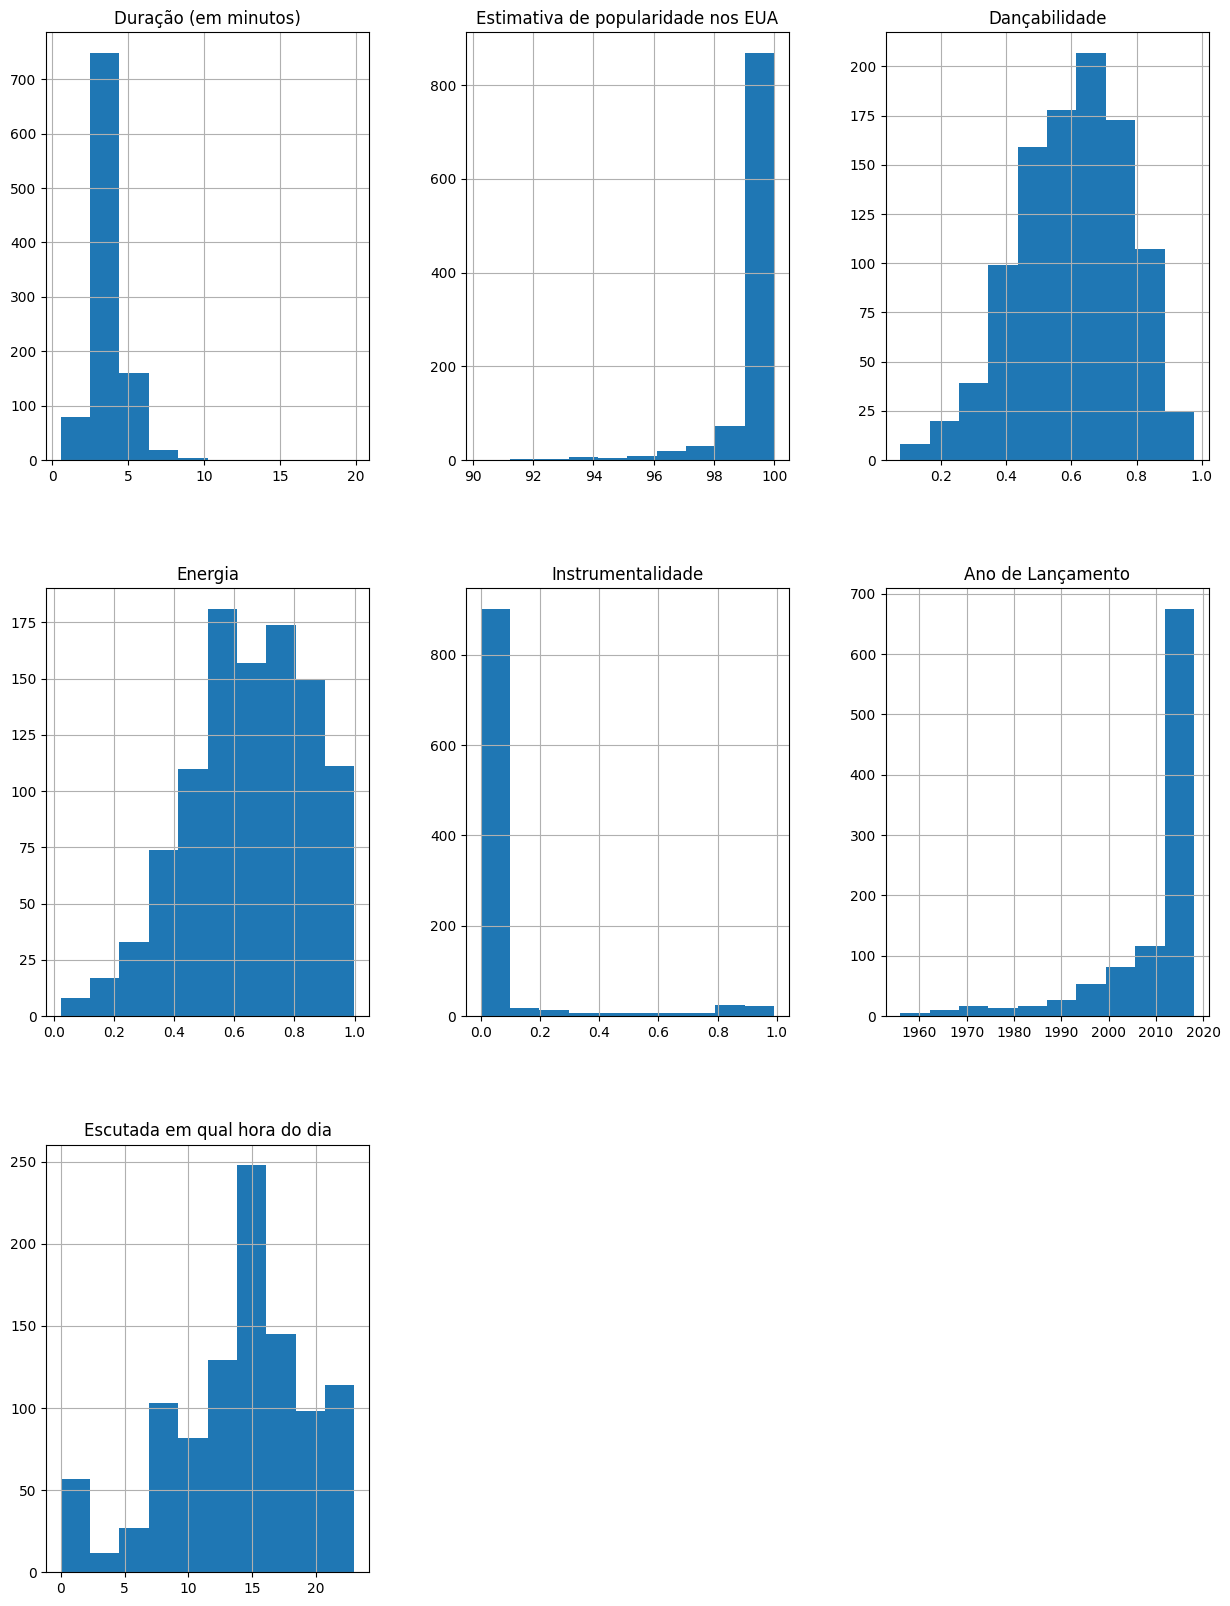

In [9]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)

<AxesSubplot:>

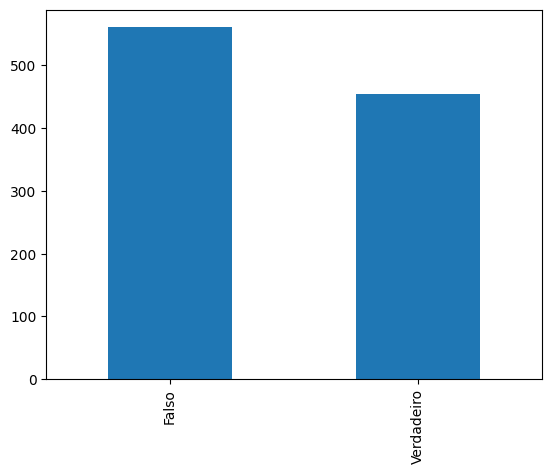

In [10]:
df['Música foi pulada no início'].value_counts().plot.bar()

<AxesSubplot:>

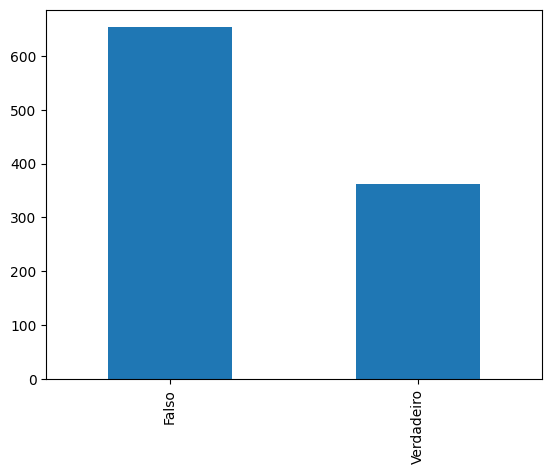

In [11]:
df['Música não foi pulada'].value_counts().plot.bar()

<AxesSubplot:>

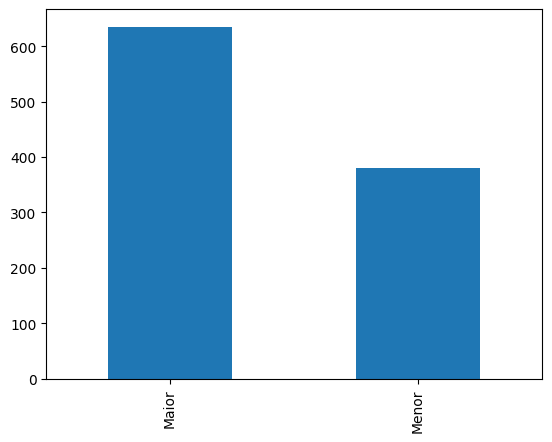

In [12]:
df['Escala musical'].value_counts().plot.bar()

# Medidas de Variabilidade

# Variância

In [13]:
df[variaveis_quantitativas].var()

C:\Users\brenn\AppData\Local\Temp\ipykernel_8568\3356078563.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[variaveis_quantitativas].var()


Dançabilidade                         0.027743
Duração (em minutos)                  1.597662
Instrumentalidade                     0.044541
Energia                               0.040676
Estimativa de popularidade nos EUA    1.206217
dtype: float64

## Desvio Padrão

In [14]:
df[variaveis_quantitativas].std()

C:\Users\brenn\AppData\Local\Temp\ipykernel_8568\2757709137.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  df[variaveis_quantitativas].std()


Dançabilidade                         0.166564
Duração (em minutos)                  1.263987
Instrumentalidade                     0.211047
Energia                               0.201684
Estimativa de popularidade nos EUA    1.098279
dtype: float64

## Coeficiente de Variação

In [15]:
coeficientes = variation(df[variaveis_quantitativas])
i = 0
for variavel in variaveis_quantitativas:
    print(variavel, coeficientes[i])
    i += 1

Dançabilidade 0.27529351701517296
Duração (em minutos) 0.3357447298079406
Instrumentalidade 3.103765555478325
Energia 0.3104568378748597
Estimativa de popularidade nos EUA 0.011036193711699642


C:\Users\brenn\AppData\Local\Temp\ipykernel_8568\657214111.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  coeficientes = variation(df[variaveis_quantitativas])


# Avaliação de Normalidade

## Distribuição Normal

C:\Users\brenn\.virtualenvs\MQA-RNh3vqsr\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Dançabilidade


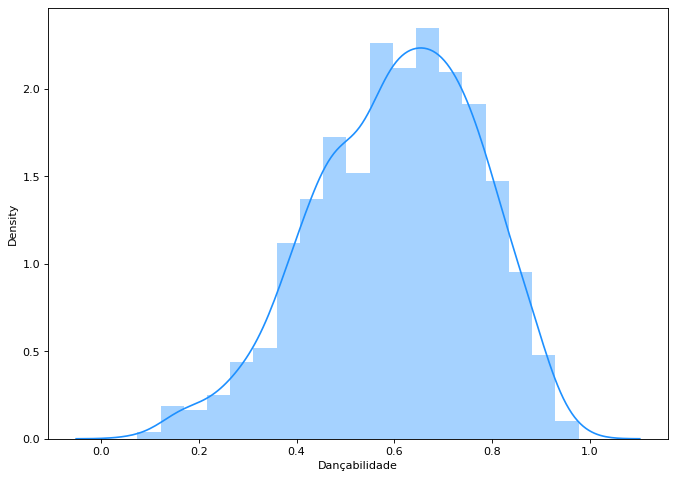

C:\Users\brenn\.virtualenvs\MQA-RNh3vqsr\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


A Hipótese Nula pode ser rejeitada
______________________________________________________________________________________________________________________


Duração (em minutos)


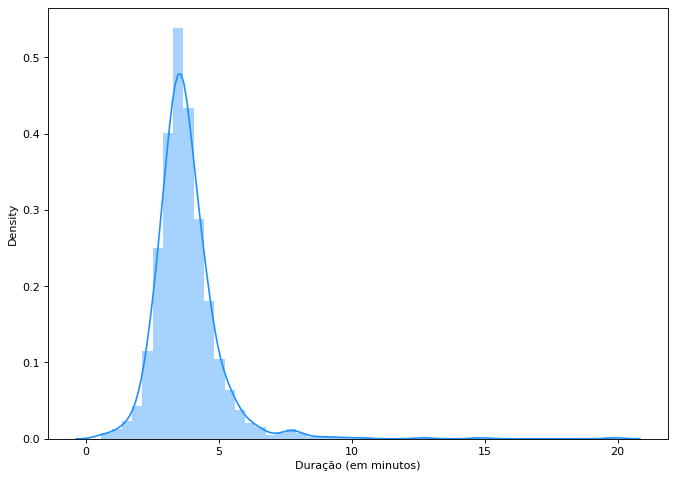

C:\Users\brenn\.virtualenvs\MQA-RNh3vqsr\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


A Hipótese Nula pode ser rejeitada
______________________________________________________________________________________________________________________


Instrumentalidade


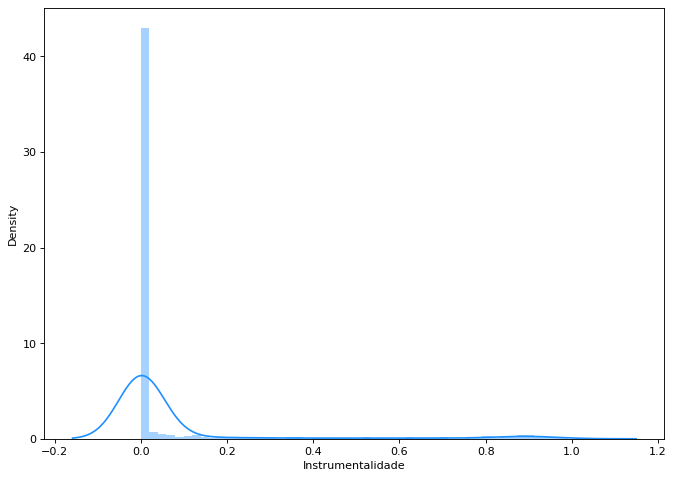

C:\Users\brenn\.virtualenvs\MQA-RNh3vqsr\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


A Hipótese Nula pode ser rejeitada
______________________________________________________________________________________________________________________


Energia


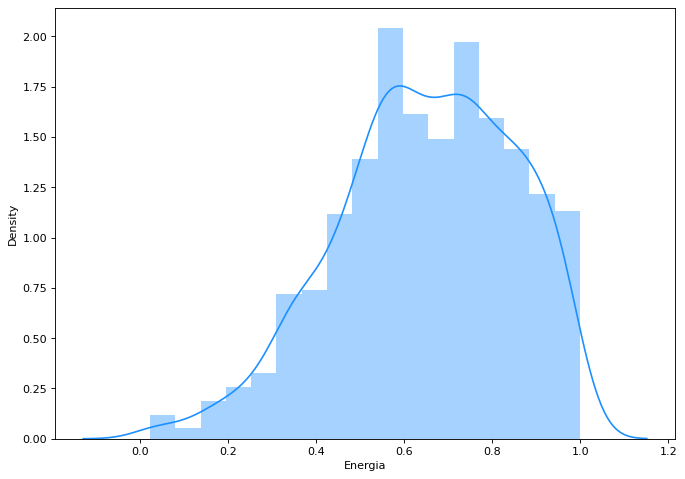

C:\Users\brenn\.virtualenvs\MQA-RNh3vqsr\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


A Hipótese Nula pode ser rejeitada
______________________________________________________________________________________________________________________


Estimativa de popularidade nos EUA


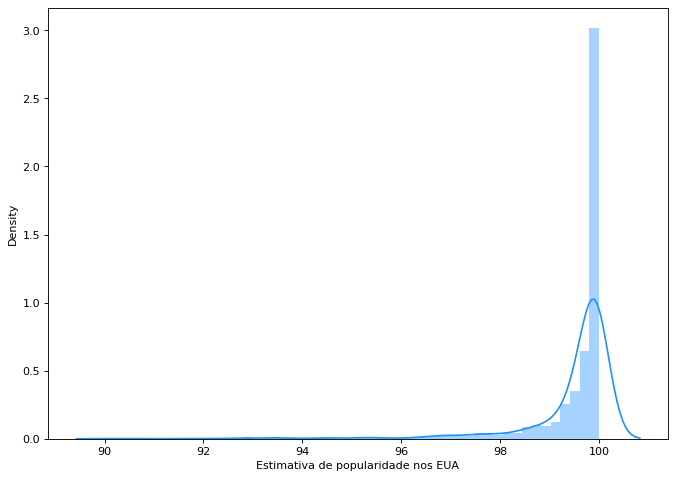

A Hipótese Nula pode ser rejeitada
______________________________________________________________________________________________________________________




In [ ]:
for variavel in variaveis_quantitativas:
    plt.figure(figsize=(10,7), dpi= 80)
    sns.distplot(df[variavel], color="dodgerblue", label="Compact",)

    print(variavel)
    plt.show()

    alpha = 0.05
    k2, p = normaltest(df[variavel])

    #Hipotese nula: Os dados seguem distribuição normal
    #Hipotese alternativa: Os dados não seguem distribuição normal

    if p < alpha:
        print("A Hipótese Nula pode ser rejeitada")
    else:
        print("A hipótese nula não pode ser rejeitada")
    print('______________________________________________________________________________________________________________________\n\n')

# Separatrizes

In [ ]:
df.quantile([.25, .5, .75], axis = 0)

,Duração (em minutos),Estimativa de popularidade nos EUA,Dançabilidade,Energia,Instrumentalidade,Ano de Lançamento,Escutada em qual hora do dia
0.25,3.128436,99.525457,0.488060,0.521084,1.763880e-08,2008.0,11.0
0.50,3.590889,99.866510,0.617222,0.656656,1.742013e-06,2015.0,15.0
0.75,4.190436,99.965101,0.730999,0.809995,4.425801e-04,2017.0,18.0


In [ ]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
numero_de_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()

C:\Users\brenn\AppData\Local\Temp\ipykernel_8568\595798457.py:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  numero_de_outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()


Dançabilidade
Número de Outliers: 2


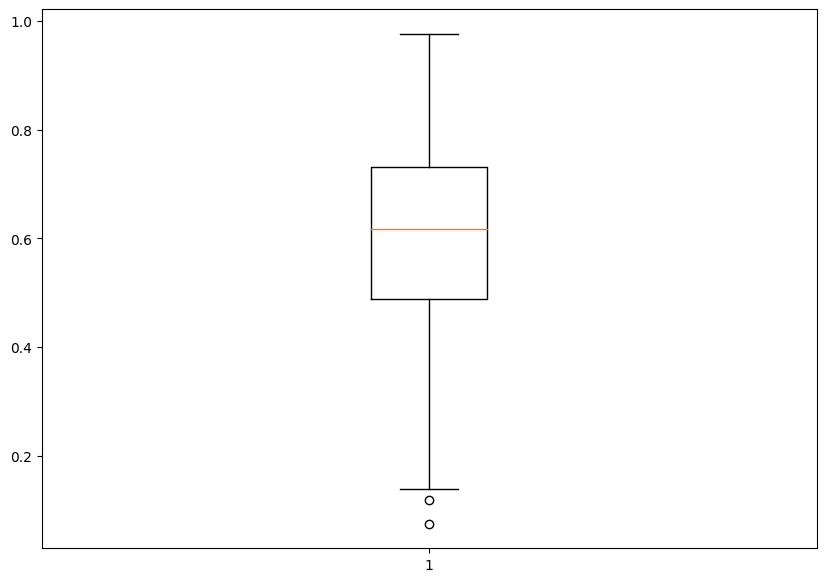

Duração (em minutos)
Número de Outliers: 53


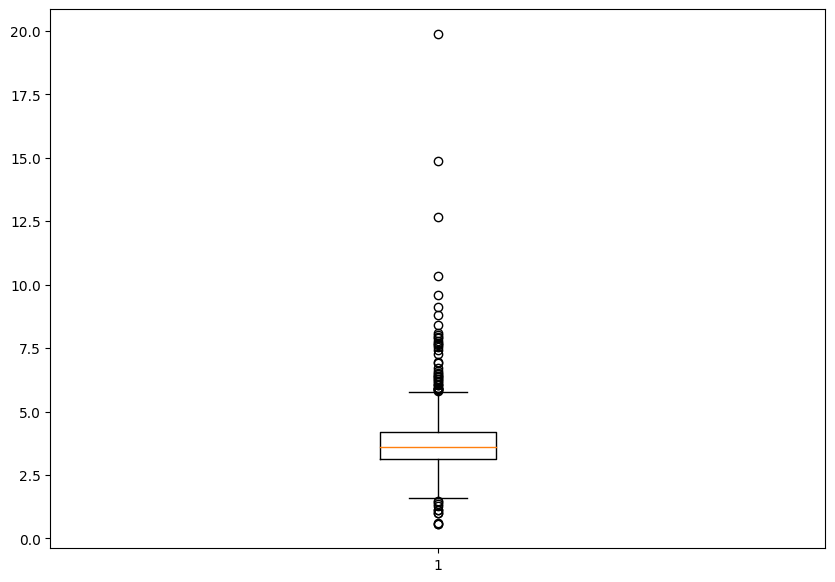

Instrumentalidade
Número de Outliers: 232


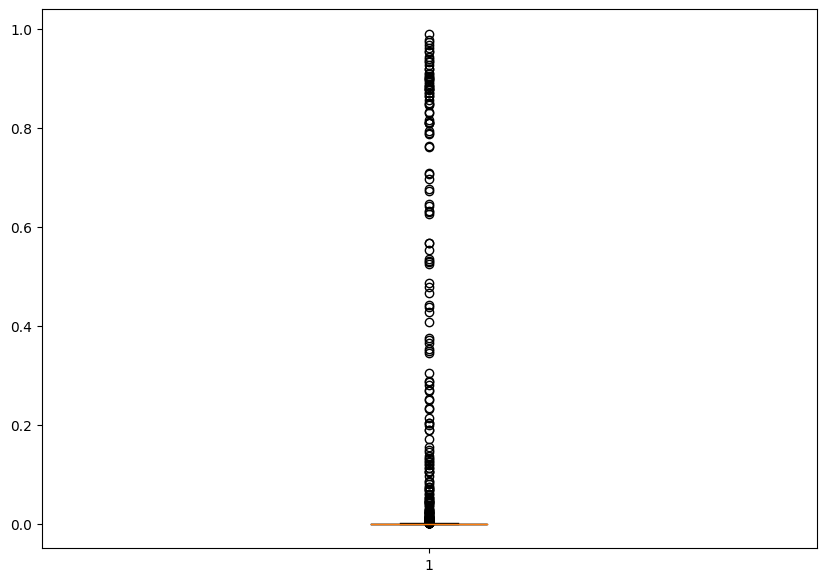

Energia
Número de Outliers: 8


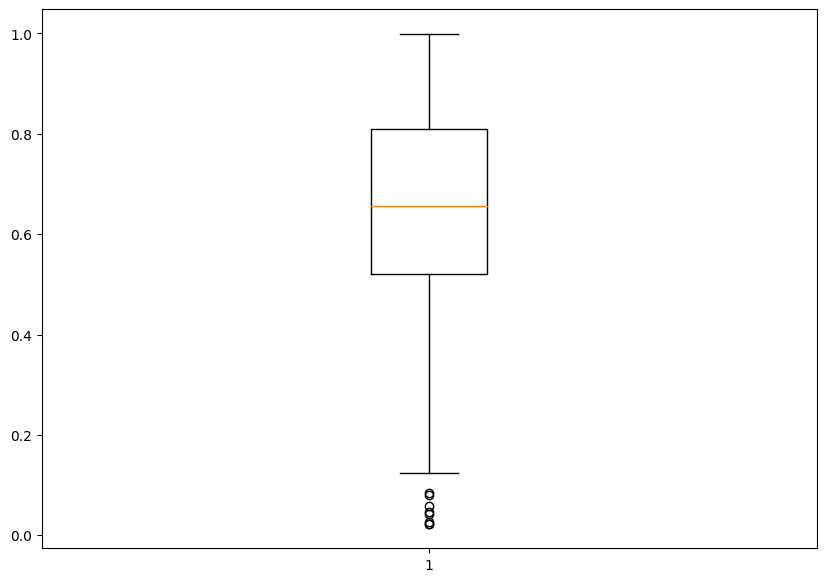

Estimativa de popularidade nos EUA
Número de Outliers: 130


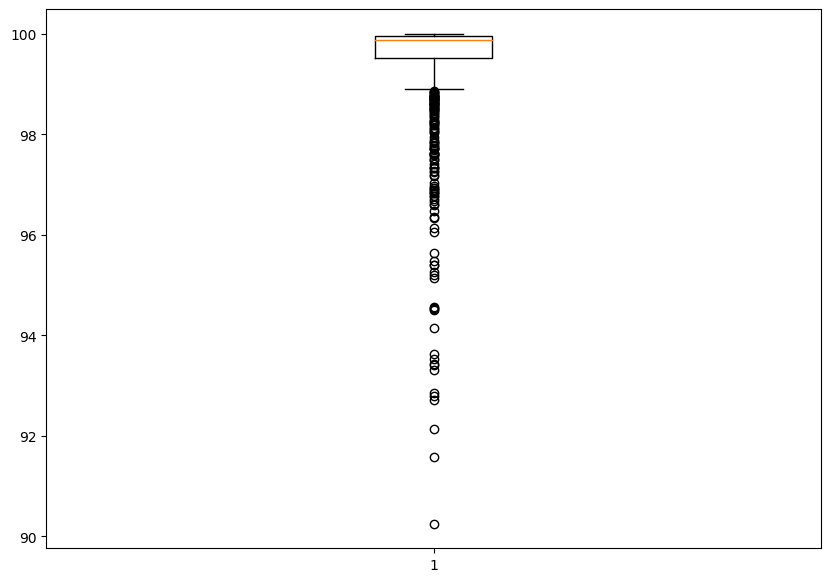

In [ ]:
for variavel in variaveis_quantitativas:
    fig = plt.figure(figsize =(10, 7)) 
    plt.boxplot(df[variavel])
    print(variavel)
    print('Número de Outliers:', numero_de_outliers[variavel])
    plt.show() 